In [1]:
# import all function from module.NaiveNN
import numpy as np
import matplotlib.pyplot as plt
from module.NaiveNN import *
import time

# random seed
np.random.seed(0)

# Scaling
In this notebook we study the dependecies of the optimized mean energy as a function of hidden units and the time of execution

In [2]:
# N number of particles, D dimension of the space
N = 2 
D = 2

# optimization parameters
optimization_step = 50 
batch_size = 500

# steps used for calculating the mean energy
run_step = 100000

In [3]:
# for H in [1, 5, 10]
Hs = [1, 2, 3, 4, 5]
mean_energies = []
std_mean_energies = []
n_params = []
execution_time = []

for H in Hs:
    params0 = init_params_guess(N, D, H, alpha=-0.44, epsilon=0.5, gamma=1.0) #gamma0.8 good

    t_start = time.time()
    opt_params, _ = optimization_adam(N, D, H, params0, optimization_steps=optimization_step, batch_size=batch_size, lr =0.01, verbose=True)
    t_end = time.time()

    chain = metropolis(N, D, opt_params, run_step, 0.1)
    energies = local_energies(chain, opt_params)
    mean_energies.append(np.mean(energies))
    std_mean_energies.append(get_std_mean_energy(energies))

    n_params.append(count_params(opt_params))

    execution_time.append(t_end - t_start)

    print("H = ", H, "n_params = ", n_params[-1], "mean_energy = ", mean_energies[-1], "+- = ", std_mean_energies[-1], "execution_time = ", execution_time[-1])

/home/luigi/Documents/PHYSICS/CP/Project_2_group/FYS4411-Project2/NN/InteractiveNN/module/NaiveNN.py:252: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  z0 = np.dot(W0, norm2)
/home/luigi/Documents/PHYSICS/CP/Project_2_group/FYS4411-Project2/NN/InteractiveNN/module/NaiveNN.py:259: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  z1 = np.dot(W1, relative_dist) + b1
/home/luigi/Documents/PHYSICS/CP/Project_2_group/FYS4411-Project2/NN/InteractiveNN/module/NaiveNN.py:264: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
  z2 = np.dot(W2, a1) + b2


Step:  0 Energy:  2.7318467167847507
Step:  1 Energy:  3.0142634865146785
Step:  2 Energy:  2.817830873875695
Step:  3 Energy:  3.4730751384553455
Step:  4 Energy:  2.9696950287748294
Step:  5 Energy:  3.167044108612725
Step:  6 Energy:  3.4033861959855027
Step:  7 Energy:  3.4003129558973604
Step:  8 Energy:  2.9641842901728195
Step:  9 Energy:  2.7471517345026872
Step:  10 Energy:  3.014311034784182
Step:  11 Energy:  3.4580512780075465
Step:  12 Energy:  3.7066278260942753
Step:  13 Energy:  2.966257447334556
Step:  14 Energy:  3.220550061594553
Step:  15 Energy:  2.84910935412301
Step:  16 Energy:  3.0394226098084673
Step:  17 Energy:  2.737300948403075
Step:  18 Energy:  2.9735690515440534
Step:  19 Energy:  2.914344228672101
Step:  20 Energy:  3.103453445854972
Step:  21 Energy:  2.957044183654737
Step:  22 Energy:  2.853517019029727
Step:  23 Energy:  2.9497653310879084
Step:  24 Energy:  2.9879753387064105
Step:  25 Energy:  3.1928713967286275
Step:  26 Energy:  3.0334026861951

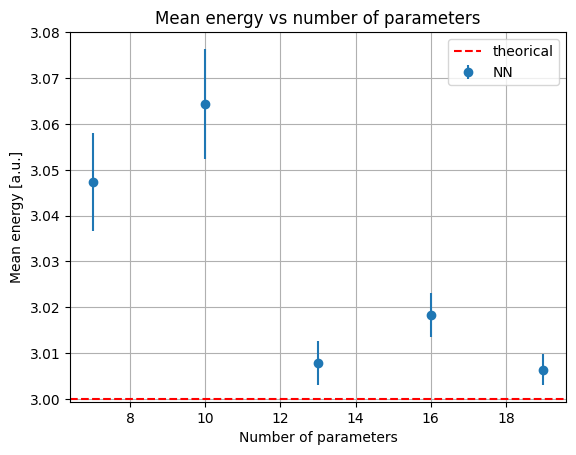

In [7]:
# plot errorbar mean energy vs number of parameters
plt.figure()
plt.errorbar(n_params, mean_energies, yerr=std_mean_energies, fmt='o', label="NN")
plt.xlabel("Number of parameters")
plt.ylabel("Mean energy [a.u.]")
plt.title("Mean energy vs number of parameters")
# add horizzontal line at 3
plt.axhline(y=3, color='r', linestyle='--', label="theorical")
plt.grid()
plt.legend()
# save in results folder
plt.savefig("results/mean_energy_vs_n_params.png")

In [5]:
# get the minimum energy

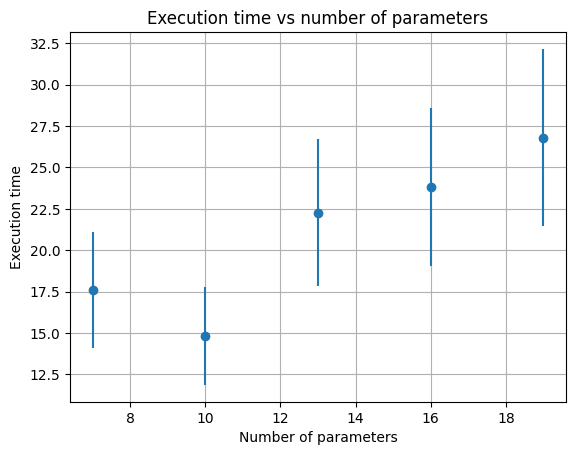

In [6]:
# plot time of execution vs number of parameters, errorbar 20% of time
plt.figure()
plt.errorbar(n_params, execution_time, yerr=0.2*np.array(execution_time), fmt='o')
plt.xlabel("Number of parameters")
plt.ylabel("Execution time")
plt.title("Execution time vs number of parameters")
plt.grid()
# save in results folder
plt.savefig("results/execution_time_vs_n_params.png")
